#Group members:
1. Aishwarya Shenoy 425828 fad64fap@rhrk.uni-kl.de
2. Rohit Keswani 425350 myn34sir@rhrk.uni-kl.de
3. Subhadeep Das 425752 deq34wim@rhrk.uni-kl.de

# Importing Tensorflow 2.0 and other helper libraries 

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.9.2


# Importing Pandas, numpy and scikit_learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Uploading the dataset to google colab


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving time_series_data_human_activities.csv to time_series_data_human_activities.csv


# Creating a dataframe

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['time_series_data_human_activities.csv']))
print(df)

         user  activity       timestamp  x-axis  y-axis    z-axis
0           1   Walking   4991922345000    0.69   10.80 -2.030000
1           1   Walking   4991972333000    6.85    7.44 -0.500000
2           1   Walking   4992022351000    0.93    5.63 -0.500000
3           1   Walking   4992072339000   -2.11    5.01 -0.690000
4           1   Walking   4992122358000   -4.59    4.29 -1.950000
...       ...       ...             ...     ...     ...       ...
1073618    36  Standing  15049012250000   -0.91    9.43  2.533385
1073619    36  Standing  15049062268000   -1.18    9.51  2.492524
1073620    36  Standing  15049112287000   -1.50    9.53  2.533385
1073621    36  Standing  15049162275000   -2.07    8.77  2.179256
1073622    36  Standing  15049212262000   -2.14    9.89  3.255263

[1073623 rows x 6 columns]


# Shortening the Dataframe from 36 participants to 5 participants

In [ ]:
df = df.drop(df[df.user > 5].index)
print(df)
df.head()


        user  activity      timestamp  x-axis  y-axis    z-axis
0          1   Walking  4991922345000    0.69   10.80 -2.030000
1          1   Walking  4991972333000    6.85    7.44 -0.500000
2          1   Walking  4992022351000    0.93    5.63 -0.500000
3          1   Walking  4992072339000   -2.11    5.01 -0.690000
4          1   Walking  4992122358000   -4.59    4.29 -1.950000
...      ...       ...            ...     ...     ...       ...
128534     5  Standing  3222692272000   -1.38   10.34  0.313268
128535     5  Standing  3222742199000   -1.18    9.81  0.081722
128536     5  Standing  3222792278000   -0.89   10.61  0.040861
128537     5  Standing  3222842205000   -0.95    9.96 -0.000000
128538     5  Standing  3222892284000   -0.11    9.77  0.040861

[128539 rows x 6 columns]


,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95


# Shape of data

In [ ]:
df.shape

(128539, 6)

#More information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128539 entries, 0 to 128538
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user       128539 non-null  int64  
 1   activity   128539 non-null  object 
 2   timestamp  128539 non-null  int64  
 3   x-axis     128539 non-null  float64
 4   y-axis     128539 non-null  float64
 5   z-axis     128539 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.9+ MB


#Checking for null values in the dataset

In [ ]:
df.isnull().sum()

user         0
activity     0
timestamp    0
x-axis       0
y-axis       0
z-axis       0
dtype: int64

#Distribution of data in the dataset

In [ ]:
df['activity'].value_counts()

Walking       55906
Jogging       41160
Downstairs    11309
Upstairs      11295
Sitting        4530
Standing       4339
Name: activity, dtype: int64

#Through this data distribution we can deduce that the data is unbalanced. Standing examples are very less in number compared to Walking examples. Thus, using this data directly will result in overfitting and the result will be skewed towards Walking.

# Let us plot x, y, z to observe the variation in data. First we convert the data from type 'string' to type 'float'.

In [ ]:
df['x-axis'] = df['x-axis'].astype('float')
df['y-axis'] = df['y-axis'].astype('float')
df['z-axis'] = df['z-axis'].astype('float')

# We can observe how the data has changed

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128539 entries, 0 to 128538
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user       128539 non-null  int64  
 1   activity   128539 non-null  object 
 2   timestamp  128539 non-null  int64  
 3   x-axis     128539 non-null  float64
 4   y-axis     128539 non-null  float64
 5   z-axis     128539 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.9+ MB


# Basic exploration of the data

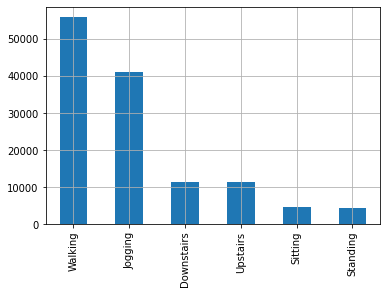

Walking       55906
Jogging       41160
Downstairs    11309
Upstairs      11295
Sitting        4530
Standing       4339
Name: activity, dtype: int64


In [ ]:
# Representation of data in a bar chart
activity_stats = df.activity.value_counts()
activities = activity_stats.index.tolist()
activity_stats.plot(kind='bar')
plt.grid()
plt.show()
print(activity_stats)

In [ ]:
# activity vs user
pd.crosstab(df.user, df.activity)

activity,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
user,,,,,,
1,2941,11056,0,0,3120,12861
2,0,11786,0,0,0,11739
3,3326,11018,1609,2824,3411,12970
4,1761,895,1257,0,1377,6079
5,3281,6405,1664,1515,3387,12257


#Let us take a specific user and perform time-series plots. The chosen user is user 5.

In [ ]:
my_user = 5
df_user = df[df.user==my_user]

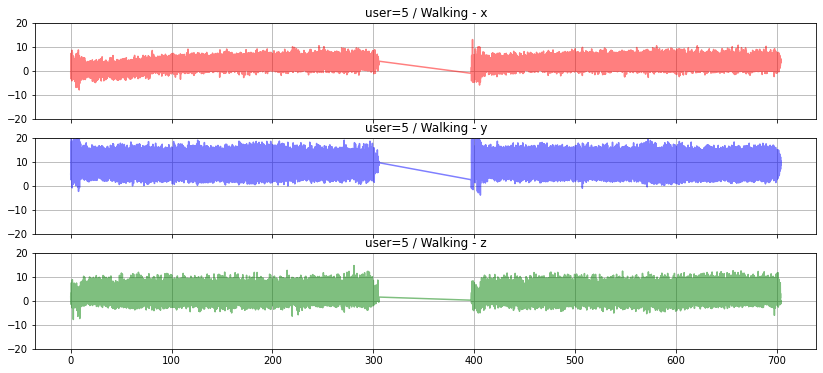

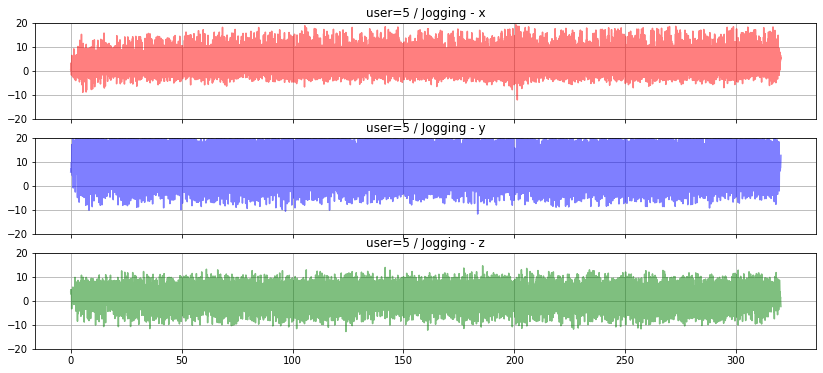

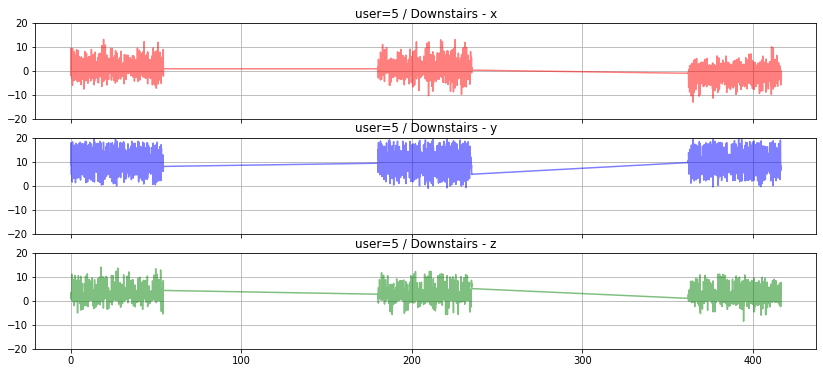

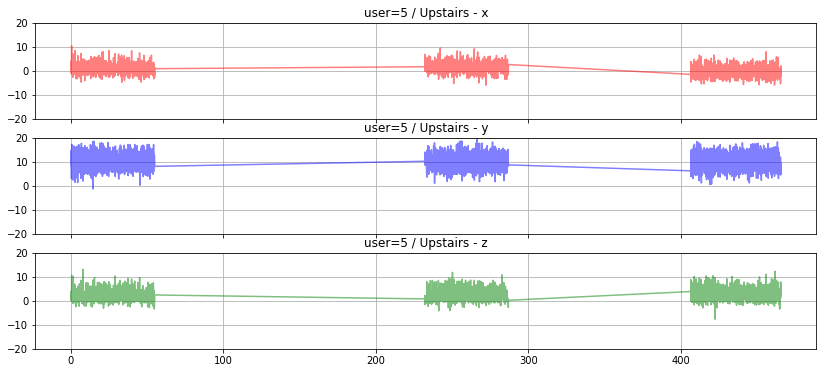

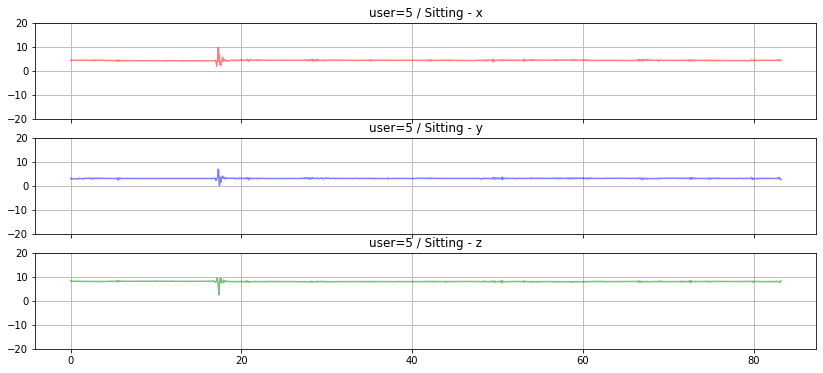

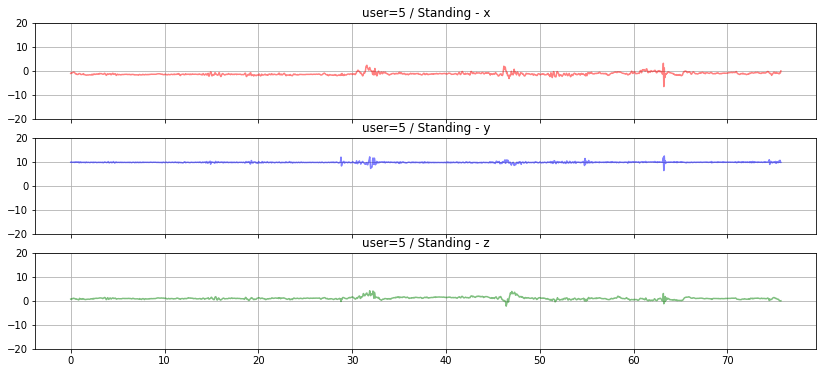

In [ ]:
for act in activities:
    df_temp = df_user.loc[df.activity==act].copy()
    df_temp.reset_index(inplace=True)
    
    # convert time to seconds and start with 0
    t_min = df_temp.timestamp.min()
    df_temp['time_sec'] = (df_temp['timestamp'] - t_min)/1e9
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,6), sharex=True)
    
    ax1.plot(df_temp['time_sec'], df_temp['x-axis'], color='red', alpha=0.5)
    ax1.set_ylim(-20,20)
    ax1.set_title('user=' + str(my_user) + ' / ' + act + ' - x')
    ax1.grid()
    
    ax2.plot(df_temp['time_sec'], df_temp['y-axis'], color='blue', alpha=0.5)
    ax2.set_ylim(-20,20)
    ax2.set_title('user=' + str(my_user) + ' / ' + act + ' - y')
    ax2.grid()

    ax3.plot(df_temp['time_sec'], df_temp['z-axis'], color='green', alpha=0.5)
    ax3.set_ylim(-20,20)    
    ax3.set_title('user=' + str(my_user) + ' / ' + act + ' - z')
    ax3.grid()
    
    plt.show()

#Let us now evaluate the standard deviation by user and activity and visualize each (user, activity) pair in a 3-D scatter plot

In [ ]:
stats_all = df.groupby(['activity','user'], as_index=False)[['x-axis','y-axis','z-axis']].std()

In [ ]:
pd.set_option('display.max_rows', 200)
stats_all

,activity,user,x-axis,y-axis,z-axis
0,Downstairs,1,8.061251,4.761467,3.978546
1,Downstairs,3,5.771033,5.208307,4.069624
2,Downstairs,4,4.149014,3.826414,3.752217
3,Downstairs,5,3.119087,4.166938,2.693416
4,Jogging,1,10.706282,9.483499,5.653878
5,Jogging,2,10.047730,4.599569,6.223608
6,Jogging,3,8.114999,7.966063,6.021514
7,Jogging,4,8.557923,9.179301,5.857416
8,Jogging,5,5.405740,7.600087,5.162815
9,Sitting,3,0.163183,0.149645,0.040073


In [ ]:
import plotly.express as p
figure = p.scatter_3d(data_frame=stats_all,
                    x='x-axis', y='y-axis', z='z-axis',
                    color='activity',
                    opacity=0.25)
figure.update_layout(title='')
figure.show()

# Finally, let's evaluate the mean (across users) of the standard deviations by activity and use a heatmap to represent it:

In [ ]:
stats_all_mean_std = stats_all.groupby('activity')[['x-axis','y-axis','z-axis']].mean()
stats_all_mean_std

,x-axis,y-axis,z-axis
activity,,,
Downstairs,5.275096,4.490781,3.623451
Jogging,8.566535,7.765704,5.783846
Sitting,0.333584,0.484354,0.349650
Standing,0.343050,0.180514,0.342553
Upstairs,4.973509,5.017096,3.558793
Walking,4.723293,4.319242,3.603355


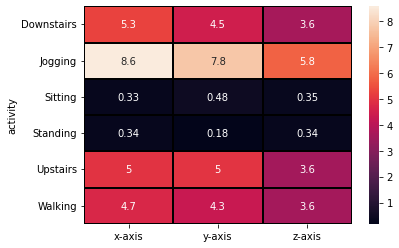

In [ ]:
import seaborn as sb
sb.heatmap(stats_all_mean_std,
            annot=True, linewidths=1, linecolor='black')
plt.show()

#Now, let us drop the columns 'user' and 'timestamp' as they are not necessary

In [ ]:
df = df.drop(['user', 'timestamp'], axis = 1).copy()
df.head()

,activity,x-axis,y-axis,z-axis
0,Walking,0.69,10.80,-2.03
1,Walking,6.85,7.44,-0.50
2,Walking,0.93,5.63,-0.50
3,Walking,-2.11,5.01,-0.69
4,Walking,-4.59,4.29,-1.95


#Now let us balance the dataset by taking only the first 4339 lines for each activity and create a balanced dataframe df_bal.

In [ ]:
Walking = df[df['activity'] == 'Walking'].head(4339).copy()
Jogging = df[df['activity'] == 'Jogging'].head(4339).copy()
Downstairs = df[df['activity'] == 'Downstairs'].head(4339).copy()
Upstairs = df[df['activity'] == 'Upstairs'].head(4339).copy()
Sitting = df[df['activity'] == 'Sitting'].head(4339).copy()
Standing = df[df['activity'] == 'Standing'].head(4339).copy()

df_bal = pd.DataFrame()
df_bal = df_bal.append([Walking, Jogging, Downstairs, Upstairs, Sitting, Standing])
df_bal.shape


(26034, 4)

In [ ]:
df_bal['activity'].value_counts()


Walking       4339
Jogging       4339
Downstairs    4339
Upstairs      4339
Sitting       4339
Standing      4339
Name: activity, dtype: int64

In [ ]:
df_bal.head()

,activity,x-axis,y-axis,z-axis
0,Walking,0.69,10.80,-2.03
1,Walking,6.85,7.44,-0.50
2,Walking,0.93,5.63,-0.50
3,Walking,-2.11,5.01,-0.69
4,Walking,-4.59,4.29,-1.95


#Here we observe that the values in x, y and z columns are of type string and we need to convert them to numeric values using LabelEncoder from sklearn.

In [ ]:
label = LabelEncoder()
df_bal['label'] = label.fit_transform(df_bal['activity'])
df_bal['label'].value_counts()

5    4339
1    4339
0    4339
4    4339
2    4339
3    4339
Name: label, dtype: int64

In [ ]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

#Standardization of data


In [ ]:
X = df_bal[['x-axis','y-axis','z-axis']]
y = df_bal['label']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X.head()



,x,y,z,label
0,0.125562,0.747120,-0.647604,5
1,0.971597,0.285962,-0.338025,5
2,0.158525,0.037540,-0.338025,5
3,-0.258999,-0.047555,-0.376469,5
4,-0.599610,-0.146374,-0.631417,5


#Frame Preparation

#Dividing the data into frames of 4 seconds. We will multiply the frequency by 4 seconds, thus taking 80 observations at a time and our hop size will be 40 but there will be some overlapping due to this.

In [ ]:
import scipy.stats as stats

In [ ]:
Fs = 20
frame_size = Fs*4
hop_size = Fs*2

In [ ]:
def get_frames(data, frame_size, hop_size):
  
  features = 3
  frames = []
  labels = []
  for i in range(0, len(data)- frame_size, hop_size):
    x = data['x'].values[i:i+frame_size]
    y = data['y'].values[i:i+frame_size]
    z = data['z'].values[i:i+frame_size]

    label = stats.mode(data['label'][i : i+frame_size])[0][0]
    frames.append([x,y,z])
    labels.append(label)

  frames = np.asarray(frames).reshape(-1, frame_size, features)
  labels = np.asarray(labels)

  return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape



((649, 80, 3), (649,))

# We have 6 six activities and each activity has 4339 examples thus we have a total of (4339*6) observations. When this is divided by our chosen hop size of 40, we get a value of approximately 649.

In [ ]:
(4339*6)/40

650.85

# Now we split the data into training data and testing data.

In [ ]:

from sklearn.model_selection import StratifiedKFold
ss = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in ss.split(X, y):
    train_features, test_features = X[train_index], X[test_index]
    train_labels, test_labels = y[train_index], y[test_index]

In [ ]:
train_features.shape, test_features.shape

((585, 80, 3), (64, 80, 3))

#Now the dataset is 3-dimensional, however each sample in the dataset is 2- dimesional

In [ ]:
train_features[0].shape, test_features[0].shape

((80, 3), (80, 3))

# Thus, we need to reshape the data samples as CNN accepts 3-dimensional data

In [ ]:
train_features = train_features.reshape(585, 80, 3, 1)
test_features = test_features.reshape(64, 80, 3, 1)

#Now we have each sample as 3-dimensional

In [ ]:
train_features[0].shape, test_features[0].shape

((80, 3, 1), (80, 3, 1))

#2D CNN model

A Sequential() model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

Conv2D() is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs. In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image. In the first Conv2D() layer we are learning a total of 16 filters each having size (2,2). We will be using ReLu activation function. The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

Dropout layer is used to by randomly set the outgoing edges of hidden units to 0 at each update of the training phase. The value passed in dropout specifies the probability at which outputs of the layer are dropped out.

Flatten() is used to convert the data into a 1-dimensional array for inputting it to the next layer.

Dense layer is the regular deeply connected neural network layer with 64 neurons. The output layer is also a dense layer with 6 neurons for the 6 classes. The activation function used is softmax. Softmax converts a real vector to a vector of categorical probabilities. The elements of the output vector are in range (0, 1) and sum to 1. Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = train_features[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

Here we are compiling the model and fitting it to the training data. We will use 10 epochs to train the model. An epoch is an iteration over the entire data provided. validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. As metrics = ['accuracy'] the model will be evaluated based on the accuracy.

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_features, train_labels, epochs = 10, validation_data= (test_features, test_labels), verbose=1)

Epoch 1/10
19/19 [==============================] - 1s 14ms/step - loss: 1.2421 - accuracy: 0.5402 - val_loss: 0.6639 - val_accuracy: 0.7812
Epoch 2/10
19/19 [==============================] - 0s 7ms/step - loss: 0.5497 - accuracy: 0.8085 - val_loss: 0.4378 - val_accuracy: 0.7969
Epoch 3/10
19/19 [==============================] - 0s 8ms/step - loss: 0.4199 - accuracy: 0.8581 - val_loss: 0.3672 - val_accuracy: 0.8281
Epoch 4/10
19/19 [==============================] - 0s 8ms/step - loss: 0.3495 - accuracy: 0.8684 - val_loss: 0.2995 - val_accuracy: 0.8906
Epoch 5/10
19/19 [==============================] - 0s 8ms/step - loss: 0.2590 - accuracy: 0.9179 - val_loss: 0.2519 - val_accuracy: 0.8906
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 0.2182 - accuracy: 0.9265 - val_loss: 0.2429 - val_accuracy: 0.8906
Epoch 7/10
19/19 [==============================] - 0s 8ms/step - loss: 0.2036 - accuracy: 0.9316 - val_loss: 0.2331 - val_accuracy: 0.9062
Epoch 8/10
19/19 [=

Now we will plot the model accuracy and overall model loss. Training accuracy and validation accuracy will be plotted in case of model accuracy and training loss and validation loss will be plotted in model loss.

In [ ]:
def plot_Curve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

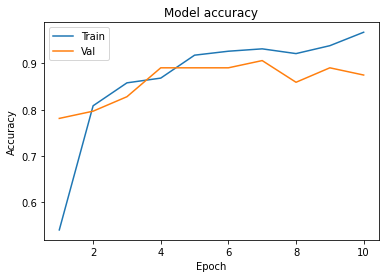

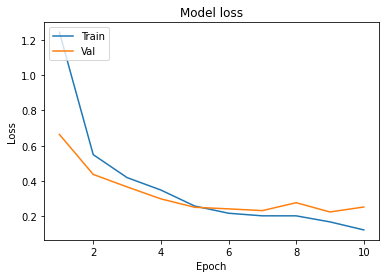

In [ ]:
plot_Curve(history, 10)

#Confusion Matrix

A Confusion Matrix is a table that is used to denote the performance of a classification model on a set of test data for which the ground truth values are known.

Each row of the matrix represents the instances of data in the predicted class. Each column of the matrix represents the instances of data in the actual class. The name arises from the fact that it makes very easy to spot when the system is confusing two classes (i.e. commonly mislabeling one class as another).

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
predicted_labels = np.argmax(model.predict(test_features), axis=-1)
classes=['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs','Walking']

2/2 [==============================] - 0s 5ms/step


0 : Downstairs
1 : Jogging
2 : Sitting
3 : Standing
4 : Upstairs
5 : Walking


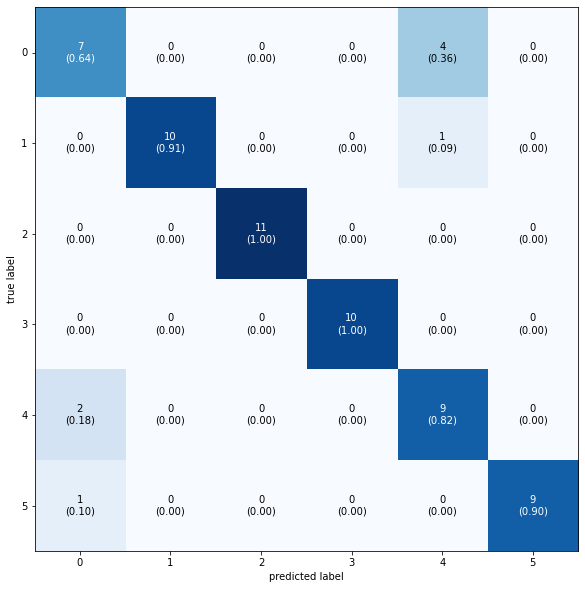

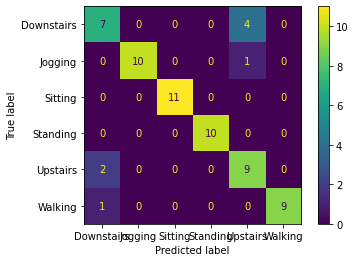

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [ ]:
c_matrix = confusion_matrix(test_labels, predicted_labels)
for i in range(6):
  print(i, ":", classes[i])
plot_confusion_matrix(conf_mat=c_matrix, show_normed=True, figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=label.classes_)
disp.plot()
plt.show()
label.classes_